In [86]:
import matplotlib.pyplot as plt
from app import *
import numpy as np


In [87]:
def test_gaussian(shape):
    image = np.clip(np.random.normal(0.5, 0.1, shape), 0.0, 1.0)
    A = []
    B = []
    C = []

    for threshold in np.linspace(0.0, 1.0, 100):
        (f, u, chi) = minkovsly2D(image, threshold)
        A.append(f)
        B.append(u)
        C.append(chi)

    return (A, B, C, image)

(F, U, Chi, image) = test_gaussian((250, 250))

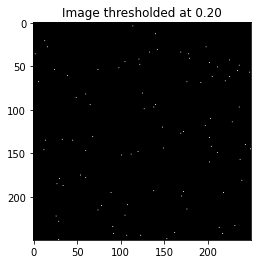

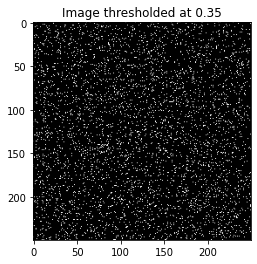

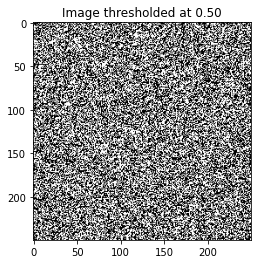

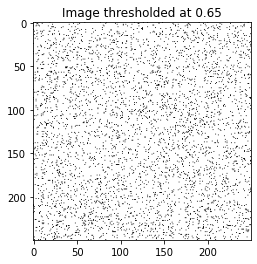

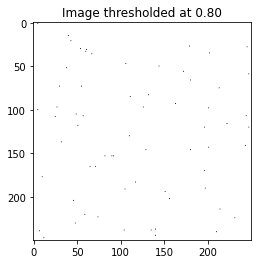

In [88]:
fig = 1
for t in np.linspace(0.2, 0.8, 5):
    timage = image.copy()
    timage[timage >= t] = 1.0
    timage[timage < t] = 0.0
    plt.figure(fig)
    plt.clf()
    plt.title("Image thresholded at "+"{:.2f}".format(t))
    plt.imshow(timage, cmap="binary")
    fig += 1
plt.show()

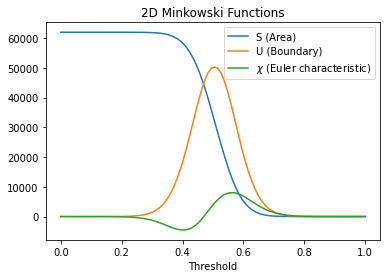

In [89]:
plt.figure(1)
plt.clf()
x = np.linspace(0.0, 1.0, 100)
plt.plot(x, F, x, U, x, Chi)
plt.title("2D Minkowski Functions")
plt.legend(["S (Area)", "U (Boundary)", "$\chi$ (Euler characteristic)"])
plt.xlabel("Threshold")
plt.show()

